In [1]:
import pandas as pd
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


seed = 78639

# Prepare Data

In [2]:
sheet1 = pd.read_csv('sheet1.csv',header=0)
sheet1 = sheet1.dropna(subset=['selectivity (%)'], ignore_index=True)

In [3]:
X = sheet1.iloc[:,1:21]
Y_S = sheet1.iloc[:,22]

# Linear Model S

In [4]:
X_onehot=pd.get_dummies(data=X, drop_first=True).fillna(0)
test_size = 0.2
X_linear_train, X_linear_test, Y_S_linear_train, Y_S_linear_test = train_test_split(X_onehot, Y_S, test_size=test_size, random_state=seed)


In [6]:
reg = LinearRegression().fit(X_linear_train, Y_S_linear_train)
Y_S_linear_test_pred=reg.predict(X_linear_test)
Y_S_linear_train_pred=reg.predict(X_linear_train)

print('Test R2: {}'.format(metrics.r2_score(Y_S_linear_test_pred, Y_S_linear_test)))
print('Test MSE: {}'.format((metrics.mean_squared_error(Y_S_linear_test_pred, Y_S_linear_test))))
print('Test RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(Y_S_linear_test_pred, Y_S_linear_test))))

print('Train R2: {}'.format(metrics.r2_score(Y_S_linear_train_pred, Y_S_linear_train)))
print('Train MSE: {}'.format(metrics.mean_squared_error(Y_S_linear_train_pred, Y_S_linear_train)))
print('Train RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(Y_S_linear_train_pred, Y_S_linear_train))))

Test R2: 0.40674495219699125
Test MSE: 388.1074082266179
Test RMSE: 19.700441828208266
Train R2: 0.4703055444373109
Train MSE: 304.5934551674545
Train RMSE: 17.452605970669666


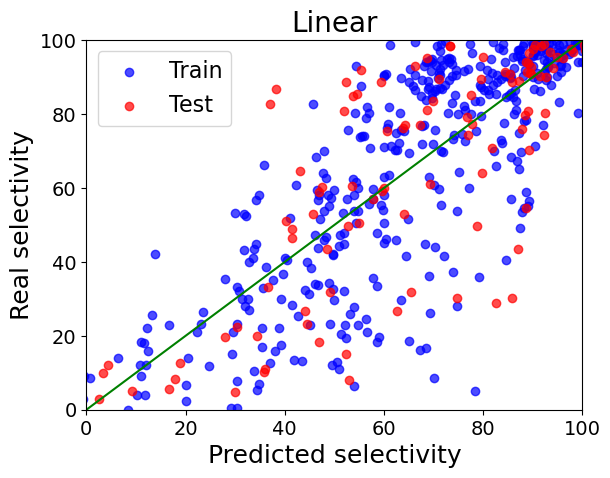

In [8]:
x=[0,100]
plt.plot(x,x,color='g')
plt.scatter(Y_S_linear_train_pred,Y_S_linear_train,color='b',label='Train',alpha=0.7)
plt.scatter(Y_S_linear_test_pred,Y_S_linear_test,color='r',label='Test',alpha=0.7)
plt.xlim(0, 100) 
plt.ylim(0, 100) 
plt.xlabel('Predicted selectivity',fontsize=18)
plt.ylabel('Real selectivity',fontsize=18)
plt.title('Linear',fontsize=20)
plt.legend(fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()

# Random Forest P


In [9]:
X_onehot=pd.get_dummies(data=X, drop_first=True).fillna(0)
test_size = 0.2
X_RF_train, X_RF_test, Y_S_RF_train, Y_S_RF_test = train_test_split(X_onehot, Y_S, test_size=test_size, random_state=seed)


In [10]:
regr = RandomForestRegressor(max_depth=20, random_state=0)
regr.fit(X_RF_train, Y_S_RF_train)
Y_S_RF_train_pred=regr.predict(X_RF_train)
Y_S_RF_test_pred=regr.predict(X_RF_test)

print('Test R2: {}'.format(metrics.r2_score(Y_S_RF_test_pred, Y_S_RF_test)))
print('Test MSE: {}'.format((metrics.mean_squared_error(Y_S_RF_test_pred, Y_S_RF_test))))
print('Test RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(Y_S_RF_test_pred, Y_S_RF_test))))

print('Train R2: {}'.format(metrics.r2_score(Y_S_RF_train_pred, Y_S_RF_train)))
print('Train MSE: {}'.format(metrics.mean_squared_error(Y_S_RF_train_pred, Y_S_RF_train)))
print('Train RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(Y_S_RF_train_pred, Y_S_RF_train))))

Test R2: 0.7147850665603752
Test MSE: 194.13641309389206
Test RMSE: 13.933284361337497
Train R2: 0.940949250983792
Train MSE: 41.8578873527206
Train RMSE: 6.469767179174271


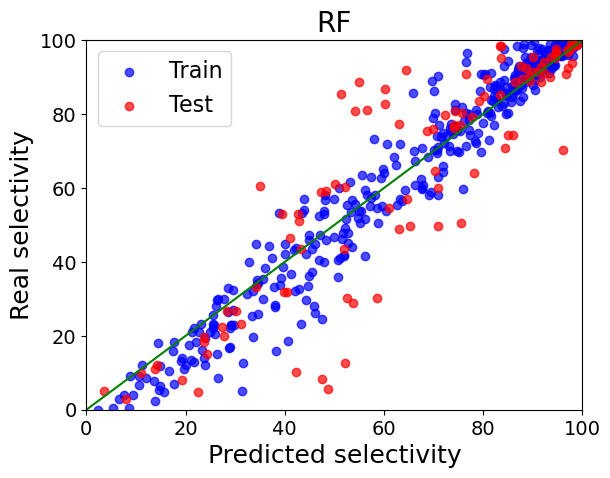

In [11]:
x=[0,100]
plt.plot(x,x,color='g')
plt.scatter(Y_S_RF_train_pred,Y_S_RF_train,color='b',label='Train',alpha=0.7)
plt.scatter(Y_S_RF_test_pred,Y_S_RF_test,color='r',label='Test',alpha=0.7)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xlabel('Predicted selectivity',fontsize=18)
plt.ylabel('Real selectivity',fontsize=18)
plt.title('RF',fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.legend(fontsize=16)
plt.show()

# Boosted Tree P


In [12]:
X_onehot=pd.get_dummies(data=X, drop_first=True).fillna(0)
test_size = 0.2
X_BT_train, X_BT_test, Y_S_BT_train, Y_S_BT_test = train_test_split(X_onehot, Y_S, test_size=test_size, random_state=seed)

In [13]:
params = {
    "n_estimators": 500,
    "max_depth": 30,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}
reg = GradientBoostingRegressor(**params)
reg.fit(X_BT_train, Y_S_BT_train)
Y_S_BT_train_pred=reg.predict(X_BT_train)
Y_S_BT_test_pred=reg.predict(X_BT_test)

# scores_BT = cross_val_score(reg, X_BT_train, Y_S_BT_train, cv=10)
# scores_cv_BT=cross_validate(reg, X_BT_train, Y_S_BT_train,return_train_score=True)
# print(scores_cv_BT)
# print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_BT.mean(), scores_BT.std()))

print('Test R2: {}'.format(metrics.r2_score(Y_S_BT_test_pred, Y_S_BT_test)))
print('Test MSE: {}'.format((metrics.mean_squared_error(Y_S_BT_test_pred, Y_S_BT_test))))
print('Test RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(Y_S_BT_test_pred, Y_S_BT_test))))

print('Train R2: {}'.format(metrics.r2_score(Y_S_BT_train_pred, Y_S_BT_train)))
print('Train MSE: {}'.format(metrics.mean_squared_error(Y_S_BT_train_pred, Y_S_BT_train)))
print('Train RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(Y_S_BT_train_pred, Y_S_BT_train))))

Test R2: 0.7938650999769401
Test MSE: 173.80781916734531
Test RMSE: 13.183619350062612
Train R2: 0.9967770521534419
Train MSE: 2.748406134435145
Train RMSE: 1.6578317569750993


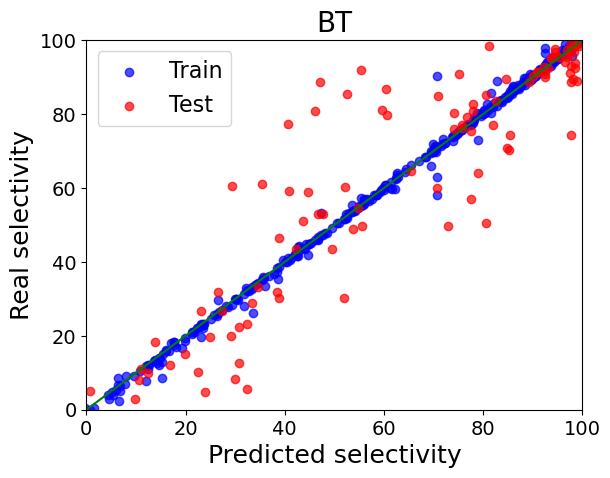

In [14]:
x=[0,100]
plt.plot(x,x,color='g')

plt.scatter(Y_S_BT_train_pred,Y_S_BT_train,color='b',label='Train',alpha=0.7)
plt.scatter(Y_S_BT_test_pred,Y_S_BT_test,color='r',label='Test',alpha=0.7)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xlabel('Predicted selectivity',fontsize=18)
plt.ylabel('Real selectivity',fontsize=18)
plt.title('BT',fontsize=20)
plt.legend(fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()

# XGBooster S


In [15]:

X["Substrate"]=X["Substrate"].astype("category")
X["method"]=X["method"].astype("category")
X["polycation"]=X["polycation"].astype("category")
X["polyanion"]=X["polyanion"].astype("category")
X["cross-linker"]=X["cross-linker"].astype("category")
X["surface charge (+/-)"]=X["surface charge (+/-)"].astype("category")
X["solute"]=X["solute"].astype("category")
X["solute charge (+/)"]=X["solute charge (+/)"].astype("category")
test_size = 0.2

X=X.rename(columns={"concentration (g/L)": "polycation concentration (g/L)", "concentration (g/L).1": "polyanion concentration (g/L)", "Ionic strength (IS)": "Ionic strength (polycation solution)", "Ionic strength (IS).1": "Ionic strength (polyanion solution)"})
X=X.rename(columns={"duration (min)": "polycation reaction duration", "duration (min).1": "polyanion reaction duration", "duration (min).2": "cross-linking duration", "concnetration (wt%)": "cross-linker concentration (wt%)"})

X_XGB_train, X_XGB_test, y_S_XGB_train, y_S_XGB_test = train_test_split(X, Y_S, test_size=test_size, random_state=765)
Xd_S_XGB_all = xgb.DMatrix(X, label=Y_S, enable_categorical=True)
Xd_S_XGB_train = xgb.DMatrix(X_XGB_train, label=y_S_XGB_train, enable_categorical=True)
Xd_S_XGB_test = xgb.DMatrix(X_XGB_test, label=y_S_XGB_test, enable_categorical=True)

In [134]:
model_XGB = xgb.train({
    'eta':1, 'max_depth':200, 'base_score': 0, "lambda": 0
}, Xd_S_XGB_train, 1)

# model = XGBRegressor(tree_method="hist", enable_categorical=True,missing=np.nan)
# model.fit(X_XGB_train, y_S_XGB_train)
y_S_XGB_test_pred=model_XGB.predict(Xd_S_XGB_test)
y_S_XGB_train_pred=model_XGB.predict(Xd_S_XGB_train)

print('Test R2: {}'.format(metrics.r2_score(y_S_XGB_test_pred, y_S_XGB_test)))
print('Test MSE: {}'.format((metrics.mean_squared_error(y_S_XGB_test_pred, y_S_XGB_test))))
print('Test RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_S_XGB_test_pred, y_S_XGB_test))))

print('Train R2: {}'.format(metrics.r2_score(y_S_XGB_train_pred, y_S_XGB_train)))
print('Train MSE: {}'.format(metrics.mean_squared_error(y_S_XGB_train_pred, y_S_XGB_train)))
print('Train RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_S_XGB_train_pred, y_S_XGB_train))))

Test R2: 0.7983155984802079
Test MSE: 185.1754490364361
Test RMSE: 13.607918615145966
Train R2: 0.9981166802349591
Train MSE: 1.6421580188706109
Train RMSE: 1.2814671353064857


In [108]:
xgb_cv

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,NaN,NaN,NaN,NaN


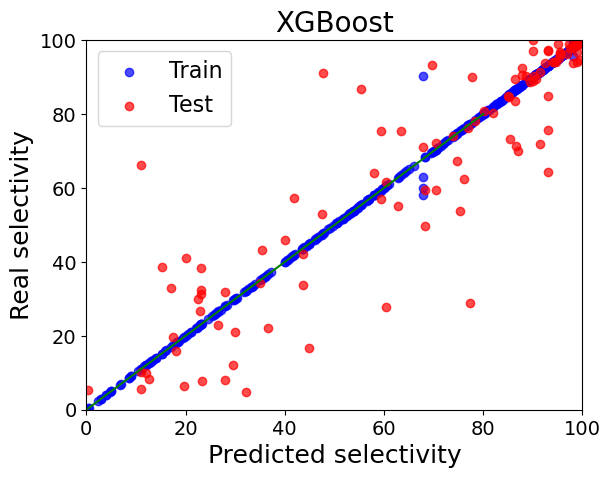

In [153]:
x=[0,80]
plt.plot(x,x,color='g')
plt.scatter(y_S_XGB_train_pred,y_S_XGB_train,color='b',label='Train',alpha=0.7)
plt.scatter(y_S_XGB_test_pred,y_S_XGB_test,color='r',label='Test',alpha=0.7)

plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xlabel('Predicted selectivity',fontsize=18)
plt.ylabel('Real selectivity',fontsize=18)
plt.title('XGBoost',fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.legend(fontsize=16)
plt.show()

# SHAP Values with XGB


In [75]:
pred = model_XGB.predict(Xd_S_XGB_all, output_margin=True)
explainer = shap.TreeExplainer(model_XGB)
shap_values = explainer.shap_values(Xd_S_XGB_all)
# np.abs(shap_values.sum(1) + explainer.expected_value - pred).max()

In [76]:
shap_values_new=np.delete(shap_values, [17,19,16,18],1)

In [80]:
X_new = X.rename(columns={"contact angle": "surface charge (+/-)", "surface charge (+/-)": "contact angle"})

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


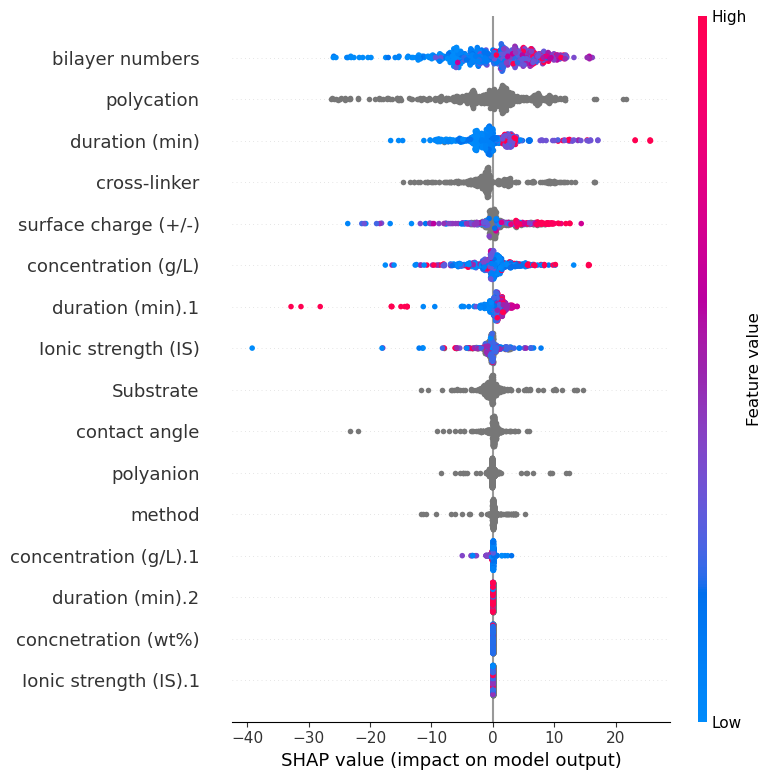

In [81]:
# shap.summary_plot(shap_values, X, max_display=10)
shap.summary_plot(shap_values_new,X_new.drop(columns=['solute','solute concentration (g/L)', 'solute charge (+/)','solute molecular weight']))

# Morgen Fingerprint


In [22]:
sheet3 = pd.read_csv('sheet3.csv',header=0)
sheet3_Polycation = sheet3.loc[:,('Polycation','SMILES formula')][0:11]
PandasTools.AddMoleculeColumnToFrame(sheet3_Polycation,'SMILES formula', 'Structure')
sheet3_Polyanion = sheet3.loc[:,('Polyanion','SMILES formula.1')][0:10]
PandasTools.AddMoleculeColumnToFrame(sheet3_Polyanion,'SMILES formula.1', 'Structure')
# sheet3_Polyanion

In [23]:
onbits_d={}
mf_d={}
structure_d={}
for i in range(len(sheet3_Polycation)):
#     onbits_d["onbits_"+sheet3_Polycation.Polycation[i]]={}
#     structure_d["structure_"+sheet3_Polycation.Polycation[i]] = sheet3_Polycation.Structure[i]
#     mf_d['my_'+sheet3_Polycation.Polycation[i]] = AllChem.GetMorganFingerprintAsBitVect(sheet3_Polycation.Structure[i], 2, nBits=512, bitInfo=onbits_d["onbits_"+sheet3_Polycation.Polycation[i]])
    onbits_d[sheet3_Polycation.Polycation[i]]={}
    structure_d[sheet3_Polycation.Polycation[i]] = sheet3_Polycation.Structure[i]
    mf_d[sheet3_Polycation.Polycation[i]] = AllChem.GetMorganFingerprintAsBitVect(sheet3_Polycation.Structure[i], 2, nBits=512, bitInfo=onbits_d[sheet3_Polycation.Polycation[i]])
for i in range(len(sheet3_Polyanion)):
    onbits_d[sheet3_Polyanion.Polyanion[i]]={}
    structure_d[sheet3_Polyanion.Polyanion[i]] = sheet3_Polyanion.Structure[i]
    mf_d[sheet3_Polyanion.Polyanion[i]] = AllChem.GetMorganFingerprintAsBitVect(sheet3_Polyanion.Structure[i], 2, nBits=512, bitInfo=onbits_d[sheet3_Polyanion.Polyanion[i]])

In [24]:
fragments_d={}
for d in onbits_d:
    for bitId in onbits_d[d].keys():
#         print(bitId)
        fragments_d[bitId]=(structure_d[d], bitId, onbits_d[d])

### Get replace polycation type with one hop array


In [25]:
# Calculate PAH/CS polycation
onbits_PAH = {}
onbits_CS = {}
MF_PAH = AllChem.GetMorganFingerprintAsBitVect(sheet3_Polycation.Structure[1], 2, nBits=512, bitInfo=onbits_PAH)
MF_CS = AllChem.GetMorganFingerprintAsBitVect(sheet3_Polycation.Structure[9], 2, nBits=512, bitInfo=onbits_CS)
PAHCS=np.multiply(MF_PAH,MF_CS)

onbits_TPMC = {}
MF_TPMC = AllChem.GetMorganFingerprintAsBitVect(sheet3_Polyanion.Structure[6], 2, nBits=512, bitInfo=onbits_TPMC)
TPMC = np.array(MF_TPMC)

onbits_PMA = {}
MF_PMA = AllChem.GetMorganFingerprintAsBitVect(sheet3_Polyanion.Structure[6], 2, nBits=512, bitInfo=onbits_PMA)
PMA = np.array(MF_PMA)

switcher={
    'PAH/CS' : PAHCS,
    'TMC' : TPMC,
    'PSPMA' : PMA,
    'TPMC/Et3N' : TPMC
}

In [26]:
mf_narray_polycation=np.empty([0,512])
for _id in range(len(sheet1)):
    if (sheet3_Polycation['Polycation']==sheet1['polycation'][_id]).sum() == 0:
        print(sheet1['polycation'][_id])
        mf=switcher[sheet1['polycation'][_id]]
#         mf=PAHCS
    else:
        index=sheet3_Polycation.index[sheet3_Polycation['Polycation']==sheet1['polycation'][_id]].item()
        onbits={}
        mf=AllChem.GetMorganFingerprintAsBitVect(sheet3_Polycation.Structure[index], 2, nBits=512, bitInfo=onbits)
#         print(np.array(mf))
    mf_narray_polycation=np.concatenate((mf_narray_polycation,np.array(mf,ndmin=2)))


PAH/CS
PAH/CS
PAH/CS


In [27]:
mf_narray_polyanion=np.empty([0,512])
for _id in range(len(sheet1)):
    if (sheet3_Polyanion['Polyanion']==sheet1['polyanion'][_id]).sum() == 0:
#         print(sheet1['polyanion'][_id])
#         print(_id)
        mf=switcher[sheet1['polyanion'][_id]]
    else:
        index=sheet3_Polyanion.index[sheet3_Polyanion['Polyanion']==sheet1['polyanion'][_id]].item()
        onbits={}
        mf=AllChem.GetMorganFingerprintAsBitVect(sheet3_Polyanion.Structure[index], 2, nBits=512, bitInfo=onbits)
#         print(np.array(mf))
    mf_narray_polyanion=np.concatenate((mf_narray_polyanion,np.array(mf,ndmin=2)))
# new_sheet1 = sheet1.join(pd.DataFrame(data=mf_narray))

new_sheet1 = sheet1.join(pd.DataFrame(data=np.multiply(mf_narray_polyanion,mf_narray_polycation)))

### Retrain XGBoost with MF


In [28]:
X_MF = new_sheet1.iloc[:,np.r_[23:535]]
Y_S_MF = new_sheet1.iloc[:,22]

In [29]:
test_size = 0.2
X_XGB_train_MF, X_XGB_test_MF, y_S_XGB_train_MF, y_S_XGB_test_MF = train_test_split(X_MF, Y_S_MF, test_size=test_size, random_state=seed)
Xd_S_XGB_all_MF = xgb.DMatrix(X_MF, label=Y_S_MF, enable_categorical=True)
Xd_S_XGB_train_MF = xgb.DMatrix(X_XGB_train_MF, label=y_S_XGB_train_MF, enable_categorical=True)
Xd_S_XGB_test_MF = xgb.DMatrix(X_XGB_test_MF, label=y_S_XGB_test_MF, enable_categorical=True)

In [30]:
model_XGB_MF = xgb.train({
    'eta':1, 'max_depth':5, 'base_score': 0, "lambda": 0
}, Xd_S_XGB_train_MF, 1)

y_S_XGB_test_pred_MF=model_XGB_MF.predict(Xd_S_XGB_test_MF)
y_S_XGB_train_pred_MF=model_XGB_MF.predict(Xd_S_XGB_train_MF)

In [31]:
pred_MF = model_XGB_MF.predict(Xd_S_XGB_all_MF, output_margin=True)
explainer_MF = shap.TreeExplainer(model_XGB_MF)
shap_values_MF = explainer_MF.shap_values(Xd_S_XGB_all_MF)

In [32]:
max_v=np.sort(abs(np.sum(shap_values_MF,axis=0)))
max_v=max_v[np.nonzero(max_v)]

In [33]:
bitid_list=[]
for value in max_v:
    col_idx=np.where(abs(np.sum(shap_values_MF,axis=0))==value)
#     print(X_MF.columns[col_idx])
    bitid_list.append(X_MF.columns[col_idx][0])
bitid_list.sort()
bitid_list

[29, 33, 58, 73, 80, 109, 295, 304, 319, 342, 414]

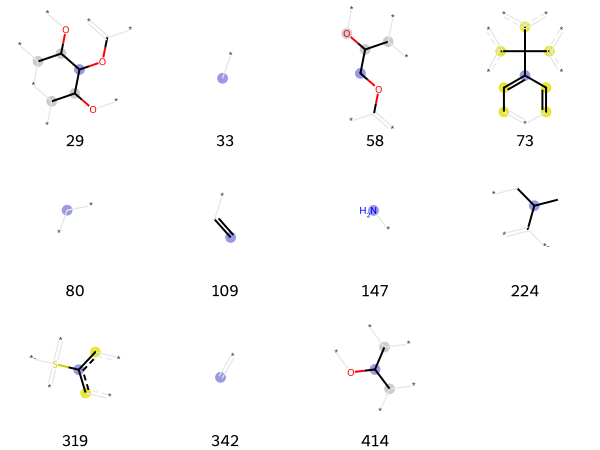

In [34]:
bitid_list = [29, 33, 58, 73, 80, 109, 147, 224, 319, 342, 414]
all_fragments = [fragments_d[x] for x in bitid_list]
Draw.DrawMorganBits(all_fragments,molsPerRow=4, legends=[str(x) for x in bitid_list])

# Tanimoto coefficient

In [35]:
sheet4 = pd.read_csv('sheet4.csv',header=0)
PandasTools.AddMoleculeColumnToFrame(sheet4,'SMILES', 'Structure')


In [36]:
mf_narray_candidate=np.empty([0,512])
for i in range(len(sheet4)):
    mf=AllChem.GetMorganFingerprintAsBitVect(sheet4.Structure[i], 2, nBits=512, bitInfo=onbits)
    mf_narray_candidate=np.concatenate((mf_narray_candidate,np.array(mf,ndmin=2)))
mf_narray_reference=np.zeros([512,1])
mf_narray_reference[bitid_list]=1

In [37]:
a=mf_narray_candidate.sum(axis=1)
b=np.ones([204])*mf_narray_reference.sum()
c=np.matmul(mf_narray_candidate,mf_narray_reference).squeeze()
tani=c/[a+b-c][0]

In [38]:
sheet4['Tanimoto coefficient Selectivity']=tani
sheet4.to_csv('sheet4_s.csv')